# Import libraries 

In [1]:
# Handle tables and linear algebra
import numpy as np
import pandas as pd
import glob

# Algorithms
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Model algorithms extra features
from sklearn.preprocessing import Normalizer, scale
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualization
import matplotlib as mpl
label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#configure visualizations
%matplotlib inline
mpl.style.use( 'ggplot')
sns.set_style( 'white')
pylab.rcParams[ 'figure.figsize'] =8,6


# Helper functions

In [4]:
def plot_correlation_map( df, mydata):
    corr=mydata.corr()
    fig,ax = plt.subplots(figsize=(12,10))
    cmap = sns.diverging_palette(220,10,as_cmap=True)
    fig = sns.heatmap(corr,
                   cmap=cmap,
                   square=True,
                   cbar_kws={'shrink':0.9},
                   ax=ax,
                   annot=True,
                   annot_kws={'fontsize':12})

In [ ]:
# def plot_distribution(df, var, target, **kwargs):
# #     **kwargs applies whatever we want to all the input 
# # values of the function. It works for dictionaries as input. 
# # If just variables we use *args
# # We make a plot for each of the values of the dictionary in kwargs. In each plot we 
# # superimpose the distribution for each of the values of target
#     row = kwargs.get('row',None)
#     col = kwargs.get('col',None)
#     facet = sns.FacetGrid(df,hue=target,aspect=4,row=row, col=col)
#     facet.map(sns.kdeplot,var,shade=True)
#     facet.set(xlim=(0,df[var].max()))
#     facet.add_legend()

In [ ]:
# def plot_categories(df,cat,target,**kwargs):
#     row=kwargs.get('row',None)
#     col=kwargs.get('col',None)
#     facet=sns.FacetGrid(df,row=row,col=col)
#     facet.map(sns.barplot,cat,target)
#     facet.add_legend()

In [ ]:
# def plot_variable_importance(X,y):
#     tree=DecisionTreeClassifier(random_state=99)
#     tree.fit(X,y)
#     plot_model_var_imp(tree,X,y)
    
# def plot_model_var_imp(model,X,y):
#     imp=pd.DataFrame(model.feature_importances_,
#     columns=['Importance'],
#     index=X.columns)
    
#     imp = imp.sort_values( [ 'Importance' ] , ascending = True )
#     imp[ : 10 ].plot( kinddef plot_histograms( df , variables , n_rows , n_cols ):
#     fig = plt.figure( figsize = ( 16 , 12 ) )
#     for i, var_name in enumerate( variables ):
#         ax=fig.add_subplot( n_rows , n_cols , i+1 )
#         df[ var_name ].hist( bins=10 , ax=ax )
#         ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
#         ax.set_xticklabels( [] , visible=False )
#         ax.set_yticklabels( [] , visible=False )
#     fig.tight_layout()  # Improves appearance a bit.
#     plt.show() = 'barh' )
#     print (model.score( X , y ))
    

SyntaxError: invalid syntax (953434471.py, line 12)

In [6]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

# Load Data

In [2]:
from os import listdir
from os.path import isfile, join

K_files = sorted([f for f in listdir("Data/Kariera_Software_Developer_Case/K") if isfile(join("Data/Kariera_Software_Developer_Case/K", f)) and "$" not in f])
L_files = sorted([f for f in listdir("Data/Kariera_Software_Developer_Case/L") if isfile(join("Data/Kariera_Software_Developer_Case/L", f)) and "$" not in f])
S_files = sorted([f for f in listdir("Data/Kariera_Software_Developer_Case/S") if isfile(join("Data/Kariera_Software_Developer_Case/S", f)) and "$" not in f])
T_files = sorted([f for f in listdir("Data/Kariera_Software_Developer_Case/T") if isfile(join("Data/Kariera_Software_Developer_Case/T", f)) and "$" not in f])
K_files

['job_knowledge_matrix_level_1.xlsx',
 'job_knowledge_matrix_level_2.xlsx',
 'job_knowledge_matrix_level_3.xlsx',
 'job_knowledge_matrix_level_4.xlsx',
 'job_knowledge_matrix_level_5.xlsx',
 'job_knowledge_matrix_level_6.xlsx']

In [63]:
# path = "Data/Kariera_Software_Developer_Case/"
# # dfs_K = pd.read_excel(path+"K/"+K_files[1], sheet_name=None)
# for i in 
# dfs_L = pd.read_excel(path+"L/"+L_files[1], sheet_name=None)

In [3]:
# Read all Excel files into a list of DataFrames
def read_excel(dataframe, path, dir, filename_list, k=0):
    

    for i in range(len(filename_list)):
        df = pd.read_excel(path+dir+filename_list[i], sheet_name=None)["Sheet1"]
        k+= len(df.columns)-1
        dataframe.append(df)# Keep 1st sheet only

    return dataframe, k


In [21]:
# a=[]
# a.append([1,2])
# a

In [4]:
merged_df_raw = []
k=0
path = "Data/Kariera_Software_Developer_Case/"
merged_df_raw, k = read_excel(merged_df_raw,path,"K/",K_files, k)
merged_df_raw, k = read_excel(merged_df_raw,path,"L/",L_files, k)
merged_df_raw, k = read_excel(merged_df_raw,path,"S/",S_files, k)
merged_df_raw, k = read_excel(merged_df_raw,path,"T/",T_files, k)
print("Total columns = ", k+1)

Total columns =  3816


In [5]:
len(merged_df_raw)

26

In [6]:
merged_df_raw[1].head()

,Unnamed: 0,http://data.europa.eu/esco/isced-f/061,http://data.europa.eu/esco/isced-f/041,http://data.europa.eu/esco/isced-f/003,http://data.europa.eu/esco/isced-f/072,http://data.europa.eu/esco/isced-f/011,http://data.europa.eu/esco/isced-f/031,http://data.europa.eu/esco/isced-f/018,http://data.europa.eu/esco/isced-f/071,http://data.europa.eu/esco/isced-f/104,...,http://data.europa.eu/esco/isced-f/101,http://data.europa.eu/esco/isced-f/023,http://data.europa.eu/esco/isced-f/053,http://data.europa.eu/esco/isced-f/038,http://data.europa.eu/esco/isced-f/058,http://data.europa.eu/esco/isced-f/054,http://data.europa.eu/esco/isced-f/079,http://data.europa.eu/esco/isced-f/092,http://data.europa.eu/esco/isced-f/051,http://data.europa.eu/esco/isced-f/081
0,562,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,563,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,735,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,985,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,986,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# # Read all Excel files into a list of DataFrames
# dfs_L = []
# for i in range(len(L_files)):
#     df = pd.read_excel(path+"L/"+L_files[i], sheet_name=None)["Sheet1"]
#     dfs_L.append(df)# Keep 1st sheet only

In [7]:
# merged_df.columns[0][0:10]

In [8]:
# df1= pd.DataFrame({'key': ['A', 'B', 'C', 'D'], 'value': np.random.randn(4)})
# df2= pd.DataFrame({'key': ['B', 'D', 'E', 'F'], 'value': np.random.randn(4)})
# df3= pd.DataFrame({'key': ['A', 'C', 'E', 'F'], 'value': np.random.randn(4)})
# df4= pd.DataFrame({'key': ['A', 'B', 'C', 'F'], 'value': np.random.randn(4)})

# df_list = [df1, df2, df3, df4]

# from functools import reduce
# df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['key'], how='outer',  suffixes = ["_"+str(suffix[2*i]), "_"+str(suffix[2*i+1])]), df_list )


In [5]:
# df_merged

In [10]:
# merged_df.columns[0]

In [23]:
#Concatenate all levels. "outer" uses union of keys from both dataframes. 
# If a dataframe does no have a given entry in the column used to merge, then it adds a NAN value.
# validate="one_to_one" raises an error if there are more than repeated entries on the column that we want to merge in a dataset
# Suffices avoids having columns with the same header
#https://pandas.pydata.org/docs/user_guide/merging.html
def concat(merged_df_raw):
    suffix = np.arange(2*len(merged_df_raw))
    merged_df = merged_df_raw[0]
    for i,df in enumerate(merged_df_raw[1:]):
    # Group rows by the matching column. We merge on the 1st column
        merged_df = pd.merge(merged_df, df, on=merged_df.columns[0], how='outer',  validate="one_to_one",  suffixes = ["_"+str(suffix[2*i]), "_"+str(suffix[2*i+1])])
    return merged_df

In [24]:
merged_df = concat(merged_df_raw)
#Replace all NAN values with 0. We obtain NAN values for entries in the column used to be merged that are not common to both datasets
merged_df = merged_df.fillna(0)

In [25]:
merged_df.isnull().values.any()

False

In [26]:
# merged_df = dfs_L[0]
# for df in dfs_L[1:]:
# # Group rows by the matching column
#     merged_df = pd.merge(merged_df, df, on=merged_df.columns[0], how='outer')

In [27]:
merged_df.head()

,Unnamed: 0,http://data.europa.eu/esco/isced-f/06,http://data.europa.eu/esco/isced-f/04,http://data.europa.eu/esco/isced-f/00,http://data.europa.eu/esco/isced-f/07,http://data.europa.eu/esco/isced-f/01,http://data.europa.eu/esco/isced-f/03,http://data.europa.eu/esco/isced-f/10,http://data.europa.eu/esco/isced-f/09,http://data.europa.eu/esco/isced-f/02,...,http://data.europa.eu/esco/skill/bc946ebd-caa8-4e18-b5c5-5928768f45fa_47,http://data.europa.eu/esco/skill/d4a4ec38-63e1-4fcf-8768-debc0dc382e8,http://data.europa.eu/esco/skill/afd63e8c-a4e7-42d3-86c9-3b2dd549a353_48,http://data.europa.eu/esco/skill/215762df-b2b4-40fa-a5e6-3004001cb315_47,http://data.europa.eu/esco/skill/ee5a80cd-dca0-421d-a855-5f763a934184,http://data.europa.eu/esco/skill/2891f0dc-4426-4a9a-8fbb-db4fb0a66f91_49,http://data.europa.eu/esco/skill/8a30eb28-eca0-4ab6-8c05-32c47d3e0dd6_49,http://data.europa.eu/esco/skill/58783f72-5098-4807-b1d1-954ec2ae94c4_49,http://data.europa.eu/esco/skill/8fa510d0-a8a6-4932-a361-00f8442cfe23_49,http://data.europa.eu/esco/skill/afd63e8c-a4e7-42d3-86c9-3b2dd549a353_49
0,562,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,563,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,735,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,985,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,986,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
len(merged_df.columns)

3816

In [17]:
# # Concatenate all dataframes
# combined_df = pd.concat(dfs_L)

# # Specify the column to match
# matching_column = df.iloc[:, 0]

In [ ]:
#Select columns from 1 onwards and convert to numpy array
# mat = merged_df.iloc[:,1:].values  #Deprecated

In [121]:
#Convert DataFrame to matrix. Select columns from 1 onwards and convert to numpy array. The 1st column just identifies a job.
mat = merged_df.iloc[:,1:].to_numpy(dtype=None, copy=False, na_value=0)

In [122]:
mat[0:3]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [123]:
np.shape(mat)

(610, 3816)

In [124]:
# # Standardize
# from sklearn.preprocessing import StandardScaler
# mat = StandardScaler().fit_transform(mat)

In [125]:
# # Convert DataFrame to matrix
# mat = merged_df.values
# Apply k-means using sklearn
km = KMeans(n_clusters=4)
km.fit(mat, sample_weight=None)
# Get cluster assignment labels
labels = km.labels_


In [126]:
len(labels)

610

In [127]:
# labels

In [128]:
# alt_labels = km.predict(mat)
# alt_labels

In [129]:
list(set(labels))

[0, 1, 2, 3]

In [130]:
#Add a column with a label
cluster_merged_df = merged_df
cluster_merged_df["labels"]= labels
col = cluster_merged_df.pop("labels")
cluster_merged_df.insert(1, "labels", col)

In [131]:
cluster_merged_df[5:8]

,Unnamed: 0,labels,http://data.europa.eu/esco/isced-f/06,http://data.europa.eu/esco/isced-f/04,http://data.europa.eu/esco/isced-f/00,http://data.europa.eu/esco/isced-f/07,http://data.europa.eu/esco/isced-f/01,http://data.europa.eu/esco/isced-f/03,http://data.europa.eu/esco/isced-f/10,http://data.europa.eu/esco/isced-f/09,...,http://data.europa.eu/esco/skill/bc946ebd-caa8-4e18-b5c5-5928768f45fa_47,http://data.europa.eu/esco/skill/d4a4ec38-63e1-4fcf-8768-debc0dc382e8,http://data.europa.eu/esco/skill/afd63e8c-a4e7-42d3-86c9-3b2dd549a353_48,http://data.europa.eu/esco/skill/215762df-b2b4-40fa-a5e6-3004001cb315_47,http://data.europa.eu/esco/skill/ee5a80cd-dca0-421d-a855-5f763a934184,http://data.europa.eu/esco/skill/2891f0dc-4426-4a9a-8fbb-db4fb0a66f91_49,http://data.europa.eu/esco/skill/8a30eb28-eca0-4ab6-8c05-32c47d3e0dd6_49,http://data.europa.eu/esco/skill/58783f72-5098-4807-b1d1-954ec2ae94c4_49,http://data.europa.eu/esco/skill/8fa510d0-a8a6-4932-a361-00f8442cfe23_49,http://data.europa.eu/esco/skill/afd63e8c-a4e7-42d3-86c9-3b2dd549a353_49
5,987,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1014,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1132,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
merged_df.shape

(610, 3817)

In [133]:
#Count number of points in each cluster
merged_df.groupby('labels')['labels'].count()

labels
0    302
1     84
2     39
3    185
Name: labels, dtype: int64

PCA decomposition

In [134]:
##Import PCA from sklearn
from sklearn.decomposition import PCA

# Create a PCA model to reduce data to 2 dimensions for visualisation
# X_train is the training data frame.
# n_components=2 will reduce to 2 dimensions
pca = PCA(n_components=2)
fit1=pca.fit(mat)

# Transform the data using scaled PCA model
X_pca = fit1.transform(mat)

In [135]:
# Convert to a Data Frame and store Cluster No
X_pca_df = pd.DataFrame(X_pca,  columns=['PCA1','PCA2'])
X_pca_df['cluster'] = cluster_merged_df['labels']
X_pca_df.tail()

,PCA1,PCA2,cluster
605,0.751337,-0.754638,0
606,-0.445386,-1.784937,0
607,0.913321,-0.521364,0
608,0.113820,-1.876068,0
609,1.168395,-0.824766,0


/var/folders/xm/b2w396ks1fv1406zj401337r0000gn/T/ipykernel_92282/2558862131.py:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='PCA1', y='PCA2',  palette=colors, hue='cluster', data=X_pca_df)


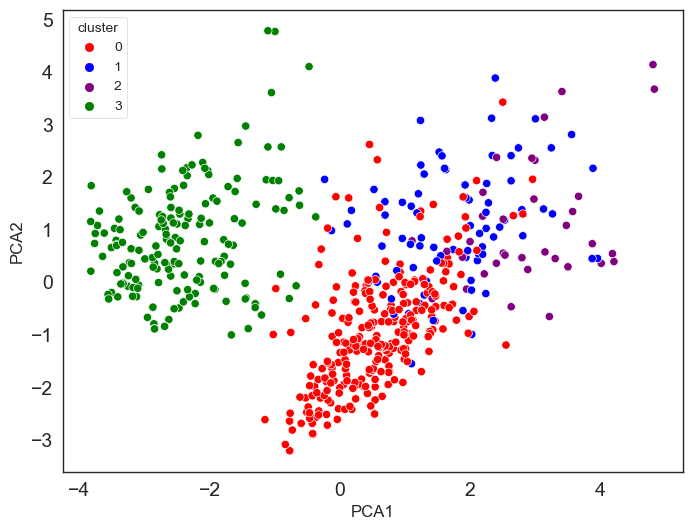

In [136]:
import seaborn as sns

##Code to generate a scatter plot
colors = ['red', 'blue', 'purple', 'green', 'black',"yellow", "orange", "brown"]
sns.scatterplot(x='PCA1', y='PCA2',  palette=colors, hue='cluster', data=X_pca_df)
plt.show()

UMAP

In [137]:
import umap
from sklearn.preprocessing import StandardScaler

In [142]:
# Initialize UMAP
reducer = umap.UMAP(n_components=2, random_state=42)

# Standardize
# mat_norm = StandardScaler().fit_transform(mat)

# Fit and transform the data
X_UMAP = reducer.fit_transform(mat)

/Users/sebastianmacaluso/anaconda3/envs/bci4rl_env/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [143]:
# Convert labels to matrix
labels_mat = X_pca_df['cluster'].to_numpy(dtype=None, copy=False, na_value=0)

In [144]:
# labels_mat

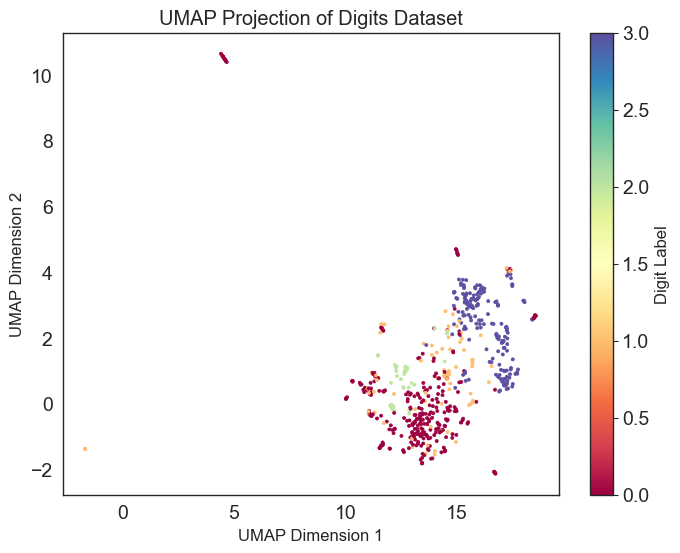

In [145]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_UMAP[:, 0], X_UMAP[:, 1], c=labels_mat, cmap='Spectral', s=5)
plt.colorbar(scatter, label='Digit Label')
plt.title('UMAP Projection of Digits Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

Get distance of new datapoint to cluster centers

In [71]:
clusterCenters  = km.cluster_centers_
clusterCenters

array([[1.00000000e+00, 5.08571429e-01, 3.42857143e-02, ...,
        5.71428571e-03, 5.71428571e-03, 1.73472348e-18],
       [7.10526316e-01, 8.15789474e-01, 5.26315789e-02, ...,
        1.73472348e-18, 0.00000000e+00, 0.00000000e+00],
       [9.43298969e-01, 6.95876289e-01, 6.70103093e-02, ...,
        1.03092784e-02, 2.38524478e-18, 5.15463918e-03],
       [7.58620690e-01, 5.76354680e-01, 9.85221675e-03, ...,
        4.33680869e-18, 2.38524478e-18, 2.38524478e-18]])

In [ ]:
# squared_dist_2_centroid = km.inertia_
# squared_dist_2_centroid

33229.082144126725

In [ ]:
# km.n_iter_

18

In [78]:
print("Sum of squared distances of every point to closest centroid = ", km.inertia_)
print("Number of iterations = ", km.n_iter_)
print("Number of features =",km.n_features_in_)

Sum of squared distances of every point to closest centroid =  33229.082144126725
Number of iterations =  18
Number of features = 3815


In [86]:
# Transform X to a cluster-distance space.
distance2centroid = km.transform(mat)

In [100]:
distance2centroid[5:8]

array([[ 7.13485266,  7.80772222,  6.35769527,  5.78400646],
       [ 9.97384334, 10.35488697,  9.06549368,  9.34592726],
       [11.81514075, 11.83049138, 10.91332678, 11.4694519 ]])

In [93]:
min_dist2centroid = np.min(distance2centroid, axis=1)
min_dist2centroid

array([ 6.78462125,  6.78462125,  6.83381564,  5.78400646,  5.78400646,
        5.78400646,  9.06549368, 10.91332678, 11.92665214, 12.06245262,
        7.25156794,  8.22039709, 10.06564436, 11.04058494, 10.09989693,
       10.66923897,  7.14946357,  7.14946357,  7.14946357, 10.57363383,
        8.07120722,  6.82443825,  5.38164658,  5.38164658,  5.38164658,
        4.88655053,  4.88655053,  4.88655053,  7.43255731,  6.33012593,
        6.25339724,  6.25339724,  5.89117665,  5.89117665,  5.89117665,
        6.06342111,  7.58476251,  8.33335938,  6.54853154,  4.60532079,
        3.9261551 ,  8.48915717,  6.50967841, 10.5624154 ,  8.60158703,
        7.75051574,  8.41131298,  9.46494784,  9.46113485,  8.49728158,
        7.39701389,  6.4842782 ,  8.13150171,  8.48915717,  9.77149655,
        5.55284081,  6.80528006,  4.56669398,  9.80099303,  5.71442857,
        7.37120708,  4.15662736,  5.71892669,  4.78484001,  5.28370618,
        5.70992691,  6.95550516,  5.86932531,  5.46812657,  5.40

In [70]:
cluster_merged_df['labels']

0      3
1      3
2      3
3      3
4      3
      ..
605    3
606    3
607    3
608    3
609    3
Name: labels, Length: 610, dtype: int32

In [120]:
# Format results as a DataFrame
clustered_results = pd.DataFrame([merged_df.index,labels]).T

In [87]:
clustered_results

,0,1
0,0,3
1,1,3
2,2,3
3,3,3
4,4,3
...,...,...
126,126,2
127,127,2
128,128,2
129,129,2


In [ ]:
# # Group rows by the matching column
# result_concat = combined_df.groupby(df.iloc[:, 0], as_index=False).apply(
#     lambda group: group.reset_index(drop=True)
# ).reset_index(drop=True)

In [76]:
# result_concat[1:10]

In [75]:

merged_df.head()



,Unnamed: 0,http://data.europa.eu/esco/skill/43f425aa-f45d-4bb4-a200-6f82fa211b66,http://data.europa.eu/esco/skill/e434e71a-f068-44ed-8059-d1af9eb592d7,http://data.europa.eu/esco/skill/6d3edede-8951-4621-a835-e04323300fa0,http://data.europa.eu/esco/skill/ea4ebfa1-e17a-4416-ac54-955f33e6ade7,http://data.europa.eu/esco/skill/9b0baaa7-fed3-41b7-b74e-9d459f11acfe,http://data.europa.eu/esco/skill/33859d93-987c-4caa-a0a9-6159ea7bbc2a,http://data.europa.eu/esco/skill/ede98e07-f07d-41bc-99b0-f88bf0dad438,http://data.europa.eu/esco/skill/4812a4ea-dc55-4dc6-b9b0-4a59bba2c647,http://data.europa.eu/esco/skill/e747e77e-0ea1-4001-8b07-1d11946b5f1b,...,http://data.europa.eu/esco/skill/0ee9e985-0ee5-4a73-8a12-78b53b261bb2,http://data.europa.eu/esco/skill/5dfc81aa-c395-4e88-a0e0-a2fbb681ecc0,http://data.europa.eu/esco/skill/64ff8d5f-58a8-4efb-af5a-e161854b3e9a,http://data.europa.eu/esco/skill/7ee20fe2-facd-4cc5-837b-927429e0e7ac,http://data.europa.eu/esco/skill/7ce196c4-65c5-4aa0-88a2-9ab08eb9fd49,http://data.europa.eu/esco/skill/ba98bef0-9c49-478f-b9db-14a4189d7c76,http://data.europa.eu/esco/skill/c44b765b-76fb-4a16-be7e-9925beee072c,http://data.europa.eu/esco/skill/e35cfb6e-ea8e-4aef-aab9-3cbc7d79647b,http://data.europa.eu/esco/skill/76506870-aeac-4bc2-96b2-cbc6702601ea,http://data.europa.eu/esco/skill/69eb9999-814b-4293-8d6c-633e49f64de4
0,562,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,563,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,735,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,985,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,986,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train=pd.read_csv('Data/train.csv')
# test=pd.read_csv('test.csv')

In [8]:
train.head();

In [9]:
full=train.append(test,ignore_index=True)

In [10]:
full.shape

(1309, 12)

In [11]:
data=full

In [12]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [264]:
data.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age level
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0.0,1305,3,male,0,NaN,A.5. 3236,low
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0.0,1306,1,female,0,NaN,PC 17758,high
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0.0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,high
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0.0,1308,3,male,0,NaN,359309,low
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1.0,1309,3,male,1,NaN,2668,low


In [221]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Age level'],
      dtype='object')

In [222]:
data.shape

(1309, 13)

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Age level      1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


In [241]:
data.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
Age level       object
dtype: object

In [243]:
data['Parch']=data['Parch'].astype('float')
data.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch          float64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
Age level       object
dtype: object

In [18]:
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [323]:
datab=data.head()
datab.set_index('Fare')
# datab

,Age,Cabin,Embarked,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age level
Fare,,,,,,,,,,,,
7.2500,22.0,NaN,S,"Braund, Mr. Owen Harris",0.0,1,3,male,1,0.0,A/5 21171,low
71.2833,38.0,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2,1,female,1,1.0,PC 17599,high
7.9250,26.0,NaN,S,"Heikkinen, Miss. Laina",0.0,3,3,female,0,1.0,STON/O2. 3101282,low
53.1000,35.0,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,4,1,female,1,1.0,113803,high
8.0500,35.0,NaN,S,"Allen, Mr. William Henry",0.0,5,3,male,0,0.0,373450,high


In [324]:
datab['Age'][2]

26.0

In [325]:
datab[['Age','Fare']]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [327]:
datab.loc[0:10,'Age':"Fare"]

,Age,Cabin,Embarked,Fare
0,22.0,NaN,S,7.2500
1,38.0,C85,C,71.2833
2,26.0,NaN,S,7.9250
3,35.0,C123,S,53.1000
4,35.0,NaN,S,8.0500


In [328]:
#Invert order
datab.loc[0:10,'Age':"Fare"][::-1]

,Age,Cabin,Embarked,Fare
4,35.0,NaN,S,8.0500
3,35.0,C123,S,53.1000
2,26.0,NaN,S,7.9250
1,38.0,C85,C,71.2833
0,22.0,NaN,S,7.2500


In [329]:
datab[datab['Age']>30]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age level
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2,1,female,1,1.0,PC 17599,high
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,4,1,female,1,1.0,113803,high
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0.0,5,3,male,0,0.0,373450,high


In [14]:
datac=data.copy()
datac=datac.loc[1:8]
datac['Total Family']=datac['SibSp']+datac['Parch']
datac.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Total Family
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,4
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,2


In [15]:
# Setting index : Parch is outer SibSp is inner index
datac=data.set_index(['Parch','SibSp'])
datac.head()

Age Cabin Embarked     Fare  \
Parch SibSp                                 
0     1      22.0   NaN        S   7.2500   
      1      38.0   C85        C  71.2833   
      0      26.0   NaN        S   7.9250   
      1      35.0  C123        S  53.1000   
      0      35.0   NaN        S   8.0500   

                                                          Name  PassengerId  \
Parch SibSp                                                                   
0     1                                Braund, Mr. Owen Harris            1   
      1      Cumings, Mrs. John Bradley (Florence Briggs Th...            2   
      0                                 Heikkinen, Miss. Laina            3   
      1           Futrelle, Mrs. Jacques Heath (Lily May Peel)            4   
      0                               Allen, Mr. William Henry            5   

             Pclass     Sex  Survived            Ticket  
Parch SibSp                                              
0     1           3    male       0.0         A/5 21171  
      1           1  female       1.0          PC 17599  
      0           3  female       1.0  STON/O2. 3101282  
      1           1  female       1.0            113803  
      0           3    male       0.0            373450

In [16]:
datac.swaplevel(0,1).head()

Age Cabin Embarked     Fare  \
SibSp Parch                                 
1     0      22.0   NaN        S   7.2500   
      0      38.0   C85        C  71.2833   
0     0      26.0   NaN        S   7.9250   
1     0      35.0  C123        S  53.1000   
0     0      35.0   NaN        S   8.0500   

                                                          Name  PassengerId  \
SibSp Parch                                                                   
1     0                                Braund, Mr. Owen Harris            1   
      0      Cumings, Mrs. John Bradley (Florence Briggs Th...            2   
0     0                                 Heikkinen, Miss. Laina            3   
1     0           Futrelle, Mrs. Jacques Heath (Lily May Peel)            4   
0     0                               Allen, Mr. William Henry            5   

             Pclass     Sex  Survived            Ticket  
SibSp Parch                                              
1     0           3    male       0.0         A/5 21171  
      0           1  female       1.0          PC 17599  
0     0           3  female       1.0  STON/O2. 3101282  
1     0           1  female       1.0            113803  
0     0           3    male       0.0            373450

In [27]:
# Group in classes and get the mean
test=datac.groupby(['Survived','Sex'])[['Age','Pclass']].mean()
test

Age    Pclass
Survived Sex                        
0.0      female  25.046875  2.851852
         male    31.618056  2.476496
1.0      female  28.847716  1.918455
         male    27.276022  2.018349

In [28]:
datac[['Age','Pclass']].head()

Age  Pclass
Parch SibSp              
0     1      22.0       3
      1      38.0       1
      0      26.0       3
      1      35.0       1
      0      35.0       3

In [21]:
data.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.077221
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


In [38]:
# plot_correlation_map(  data , data)

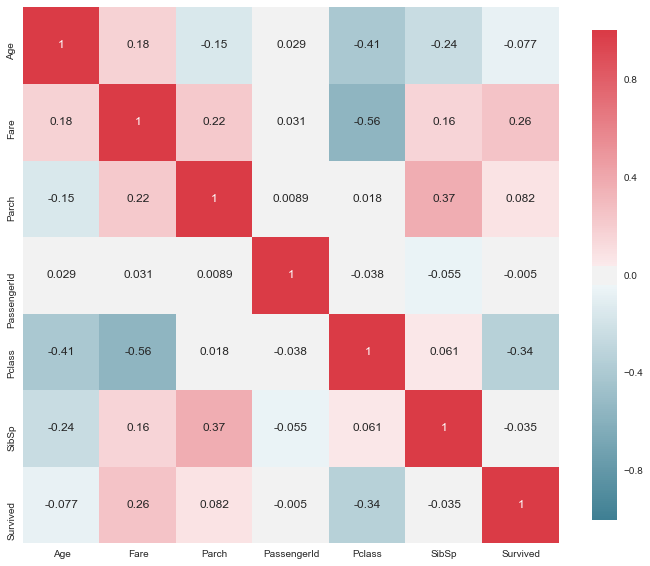

In [158]:
    corr=data.corr()
    f,ax = plt.subplots(figsize=(12,10))
    cmap = sns.diverging_palette(220,10,as_cmap=True)
    f = sns.heatmap(corr,
                   cmap=cmap,
                   square=True,
                   cbar_kws={'shrink':0.9},
                   ax=ax,
                   annot=True,
                   annot_kws={'fontsize':12}
                   )
#     plt.show()

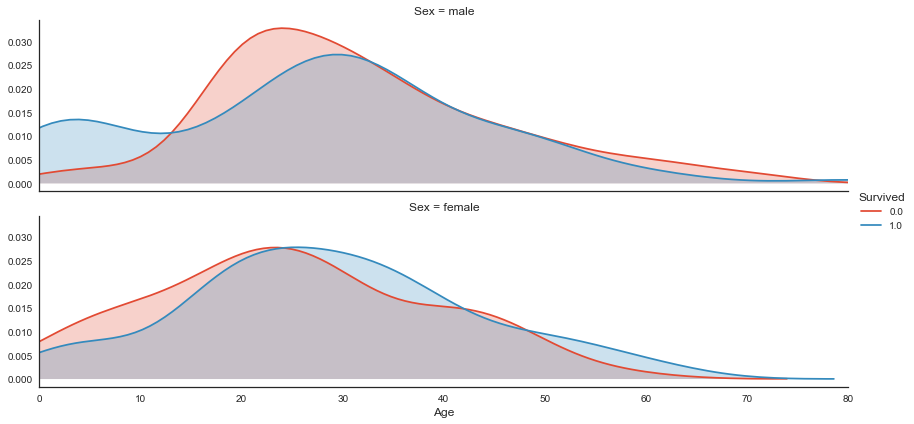

In [56]:
plot_distribution(data,var='Age',target='Survived',row='Sex')

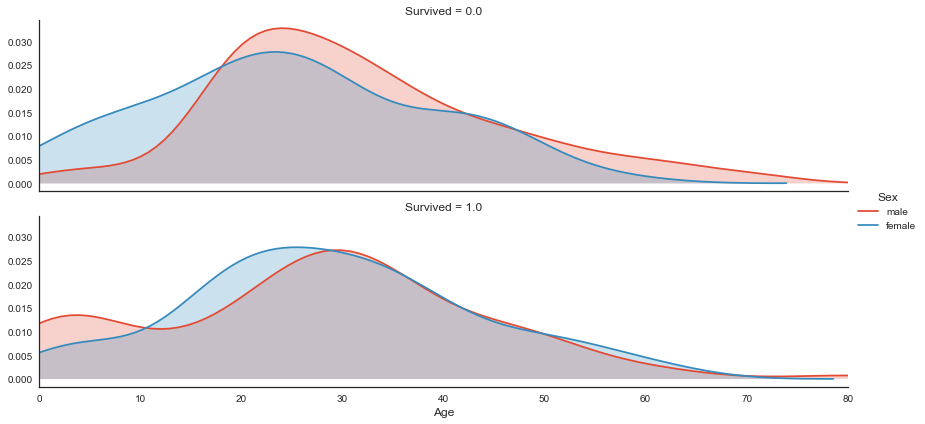

In [147]:
plot_distribution(data,var='Age',target='Sex',row='Survived')

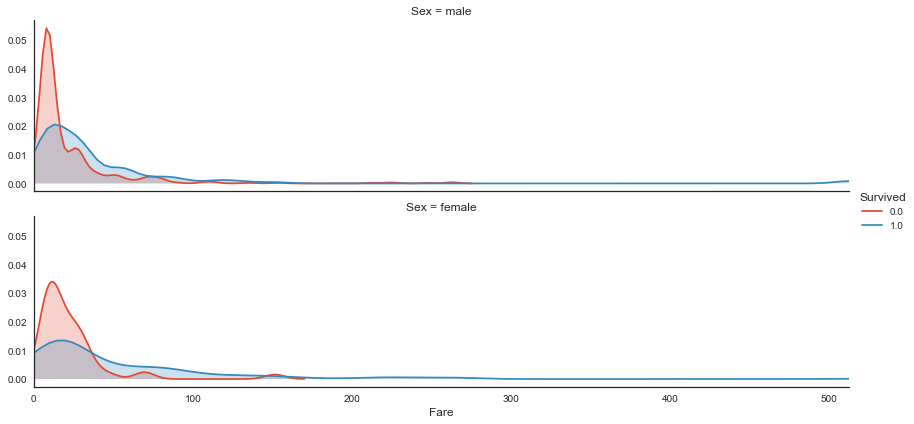

In [58]:
plot_distribution(dataplot_distribution(data,var='Fare',target='Survived',row='Sex'),var='Fare',target='Survived',row='Sex')

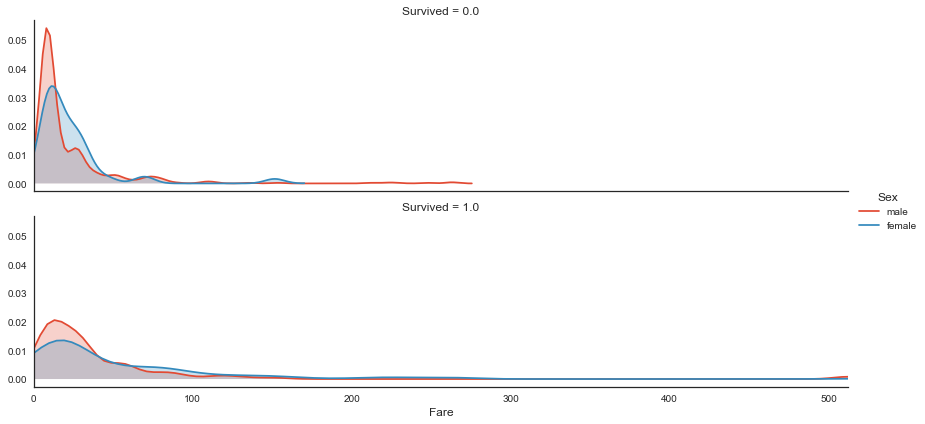

In [149]:
plot_distribution(data,var='Fare',target='Sex',row='Survived')

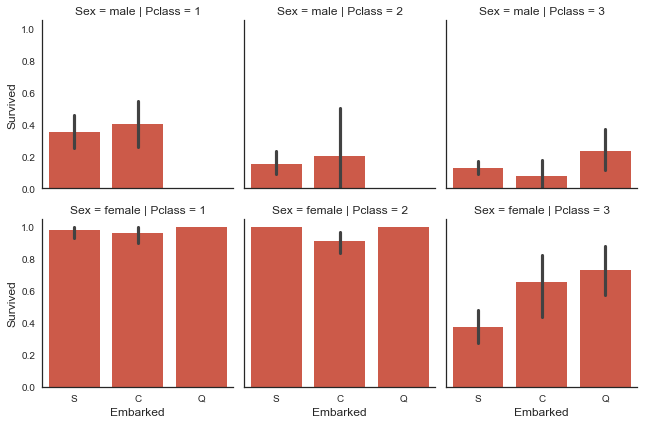

In [153]:
#Plot rate by category
plot_categories(data,cat='Embarked',target='Survived',row='Sex',col='Pclass')

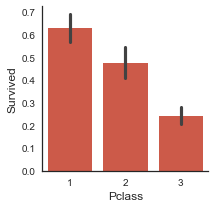

In [62]:
plot_categories(data,cat='Pclass',target='Survived')

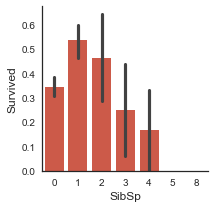

In [63]:
plot_categories(data,cat='SibSp',target='Survived')

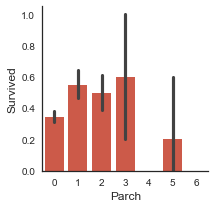

In [64]:
plot_categories(data,cat='Parch',target='Survived')

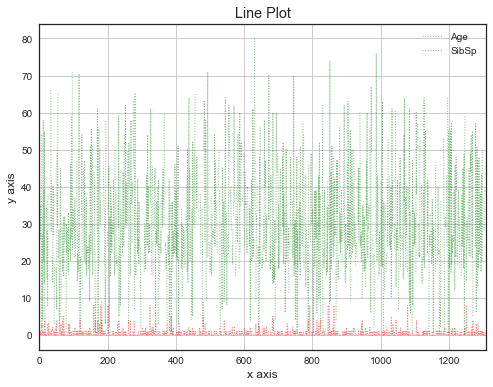

In [166]:
data.Age.plot(kind='line',color='g',label='Age',linewidth=1,alpha=0.5,grid=True,linestyle=':')
data.SibSp.plot(kind='line',color='r',label='SibSp',linewidth=1,alpha=0.5,grid=True,linestyle=':')
plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line Plot')

In [162]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

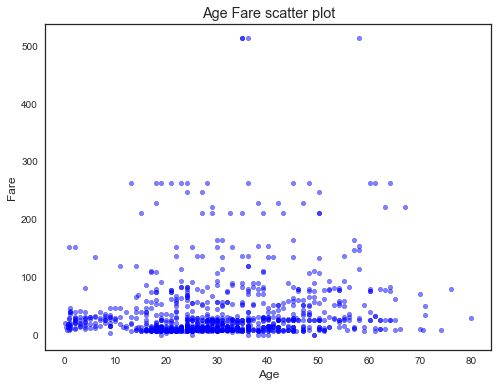

In [177]:
# Scatter plot
data.plot(kind='scatter',x='Age',y='Fare',alpha=0.5,color='b')
# plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age Fare scatter plot')

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 <a list of 11 Text xticklabel objects>)

(array([ 0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,
         0.04 ,  0.045]), <a list of 10 Text yticklabel objects>)

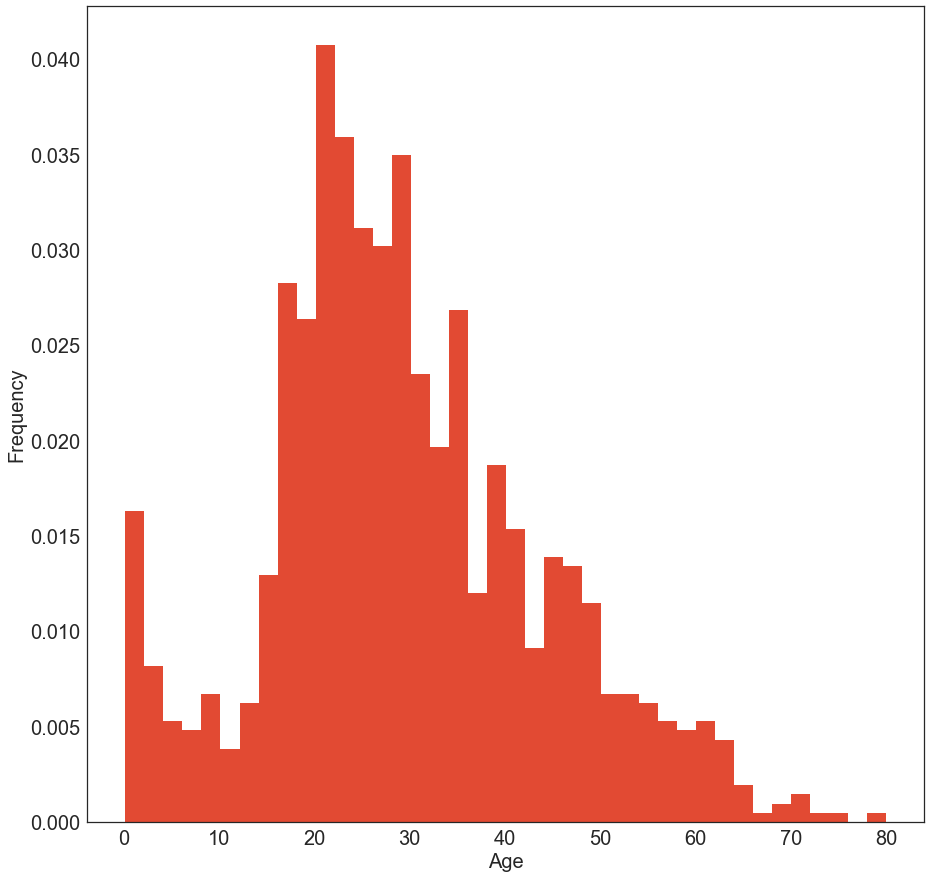

In [273]:
# Histogram
fig=data.Age.plot(kind='hist',bins=40,figsize=(15,15),normed=True)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


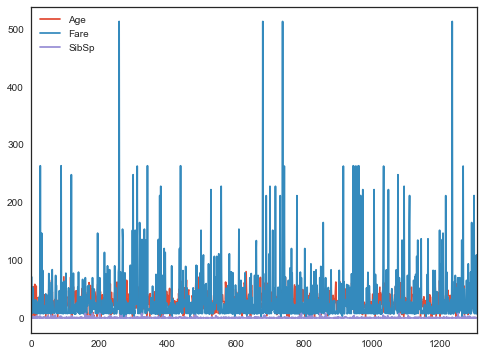

In [268]:
# Plot all data
data1=data.loc[:,["Age",'Fare','SibSp']]
data1.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x125ebe2e8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1266e9e48>], dtype=object)

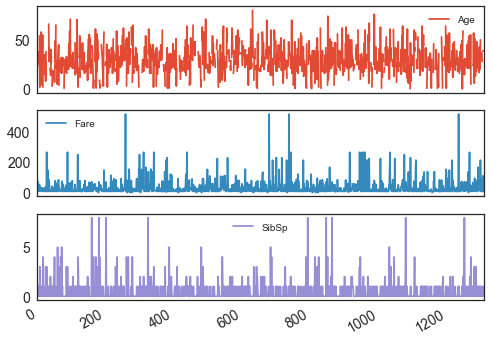

In [321]:
#subplots
data1.plot(subplots=True)

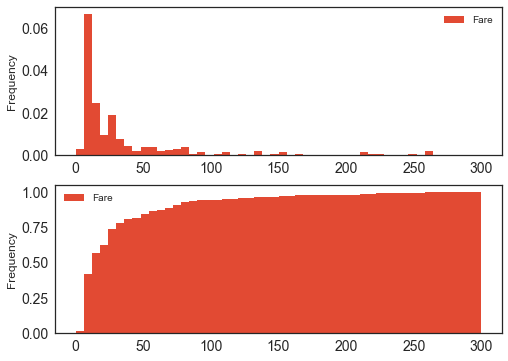

In [320]:
# Histogram subplot with non cumulative and cumulative
fig,axes=plt.subplots(nrows=2,ncols=1)
data1.plot(kind='hist',y='Fare',bins=50, range=(0,300),normed=True,ax=axes[0])
data1.plot(kind='hist',y='Fare', bins=50,range=(0,300),normed=True,cumulative=True,ax=axes[1])
# ax.set_xticklabels('Fare', fontsize=40 )
# axes[0].set_xticks(size=40 )
# axes[0].label.set_fontsize(20)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=20)
# ax.tick_params(axis='both')

In [208]:
data2=data['Age']>74
data[data2]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
630,80.0,A23,S,30.00,"Barkworth, Mr. Algernon Henry Wilson",0,631,1,male,0,1.0,27042
987,76.0,C46,S,78.85,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,988,1,female,1,NaN,19877


In [210]:
data[(data['Age']>60)& (data['Fare']>100)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
438,64.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Mark",4,439,1,male,1,0.0,19950
972,67.0,C55 C57,S,221.7792,"Straus, Mr. Isidor",0,973,1,male,1,NaN,PC 17483
1005,63.0,C55 C57,S,221.7792,"Straus, Mrs. Isidor (Rosalie Ida Blun)",0,1006,1,female,1,NaN,PC 17483
1033,61.0,B57 B59 B63 B66,C,262.3750,"Ryerson, Mr. Arthur Larned",3,1034,1,male,1,NaN,PC 17608


In [217]:
treshold=data.Age.mean()
data['Age level']=['high' if i>treshold else 'low' for i in data.Age]
data.loc[:10,['Age level','Age']]
# print(data.Age.mean())
# data.head()

,Age level,Age
0,low,22.0
1,high,38.0
2,low,26.0
3,high,35.0
4,high,35.0
5,low,NaN
6,high,54.0
7,low,2.0
8,low,27.0
9,low,14.0


In [218]:
data.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age level
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,low
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,high
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,high
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,low
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668,low


# Data preparation

## Cleaning data

In [227]:
# Count the frequency of each type
data['SibSp'].value_counts(dropna=False) 
#dropna is to drop the missing data

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

# Visual analysis

### Tidy data

In [229]:
data_new=data.head()

In [234]:
# Melting
melted=pd.melt(frame=data_new,id_vars='Name',value_vars=['Age','Fare'])
melted


,Name,variable,value
0,"Braund, Mr. Owen Harris",Age,22.0000
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Age,38.0000
2,"Heikkinen, Miss. Laina",Age,26.0000
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Age,35.0000
4,"Allen, Mr. William Henry",Age,35.0000
5,"Braund, Mr. Owen Harris",Fare,7.2500
6,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Fare,71.2833
7,"Heikkinen, Miss. Laina",Fare,7.9250
8,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Fare,53.1000
9,"Allen, Mr. William Henry",Fare,8.0500


In [235]:
# Pivot (reverse of melting)
melted.pivot(index='Name',columns='variable',values='value')

variable,Age,Fare
Name,,
"Allen, Mr. William Henry",35.0,8.0500
"Braund, Mr. Owen Harris",22.0,7.2500
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.0,71.2833
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000
"Heikkinen, Miss. Laina",26.0,7.9250


### Concatenating data

In [238]:
# Concatenate rows
data1=data.head()
data2=data.tail()
conc_data_row=pd.concat([data1,data2],axis=0,ignore_index=True)
conc_data_row

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age level
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,low
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,high
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,low
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,high
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,high
5,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,low
6,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,high
7,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,high
8,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,low
9,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668,low


In [239]:
# Concatenate columns
data1=data['Age'].head()
data2=data['Fare'].head()
conc_data_col=pd.concat([data1,data2],axis=1)
conc_data_col

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [240]:
data.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
Age level       object
dtype: object

## Missing data

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null float64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Age level      1309 non-null object
dtypes: float64(4), int64(3), object(6)
memory usage: 133.0+ KB


In [248]:
data['Embarked'].value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: Embarked, dtype: int64

In [249]:
# We check if column[1]=='Name'. If true, then no output, else gives an error
assert data.columns[1]=='Name'

AssertionError: 

In [267]:
assert data.columns[1]=='Cabin'
# data.head()


## Fill missing values with the mean

In [17]:
#Create dataset
imputed = pd.DataFrame()

# Fill missing values with the mean
imputed['Age'] = data.Age.fillna(data.Age.mean())
imputed['Fare'] = data.Fare.fillna(data.Fare.mean())
imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


## Transform to binary values


In [18]:
sex=pd.Series(np.where(data.Sex=='male',1,0),name='Sex')
sex.head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

## Transform to categorical
#Create a new variable for every value of a categorical variable


In [19]:
embarked=pd.get_dummies(data.Embarked,prefix='Embarked')
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [20]:
pclass=pd.get_dummies(data.Pclass,prefix='Pclass')
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


# Feature engineering - Creating new variables

In [21]:
# Extract titles from passenger names
title=pd.DataFrame()
title['Title']=data['Name'].map(lambda name: 
                name.split(',')[1].split('.')[0].strip())

# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

# we map each title
title.head(10)

title['Title']=title.Title.map(Title_Dictionary)
title.head()
title=pd.get_dummies(title.Title)
title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [22]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [23]:
# Extract cabin category information from the Cabin number
cabin=pd.DataFrame()

#replacing missing cabins with U (for Unknown)
cabin['Cabin']=data.Cabin.fillna('U')

# mapping each cabin value with the cabin letter
cabin['Cabin']=cabin['Cabin'].map(lambda c: c[0])

# dummy encoding
cabin=pd.get_dummies(cabin['Cabin'],prefix='Cabin')

cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


# Extract ticket class from ticket number

In [24]:
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
def cleanTicket( ticket ):
    ticket = ticket.replace( '.' , '' )
    ticket = ticket.replace( '/' , '' )
    ticket = ticket.split()
    ticket = map( lambda t : t.strip() , ticket )
    ticket = list(filter( lambda t : not t.isdigit() , ticket ))
    if len( ticket ) > 0:
        return ticket[0]
    else: 
        return 'XXX'

ticket = pd.DataFrame()

# Extracting dummy variables from tickets:
ticket[ 'Ticket' ] = data[ 'Ticket' ].map( cleanTicket )
ticket = pd.get_dummies( ticket[ 'Ticket' ] , prefix = 'Ticket' )

ticket.shape
ticket.head()

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1



# Create family size and category family size

In [25]:
family=pd.DataFrame()

In [26]:
# Get total size of a family
family['FamilySize']=data['Parch']+data['SibSp']+1
# family['Family_sex']=family['Sex'].map(lambda s:  1 if s=='male' else 0)
# introducing other features based on the family size
family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Family_Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


# Assemble final datasets for modeling


In [27]:
# Variable selection
data_x=pd.concat([imputed,embarked,cabin,sex,family],axis=1)
data_x.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Sex,FamilySize,Family_Single,Family_Small,Family_Large
0,22.0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,1,2,0,1,0
1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0,1,0
2,26.0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,35.0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0,0,2,0,1,0
4,35.0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0


# Create train, val and tests datasets

In [28]:
data_x.shape

(1309, 19)

In [29]:
train_valid_x=data_x[0:891]
train_valid_y=data.Survived[0:891]
test_x=data_x[891:]
train_x,valid_x,train_y,valid_y=train_test_split(train_valid_x,train_valid_y,train_size=0.7)

print(data_x.shape, train_x.shape, valid_x.shape, train_y.shape,valid_y.shape, test_x.shape)

(1309, 19) (623, 19) (268, 19) (623,) (268,) (418, 19)


# Feature importance

0.99036918138


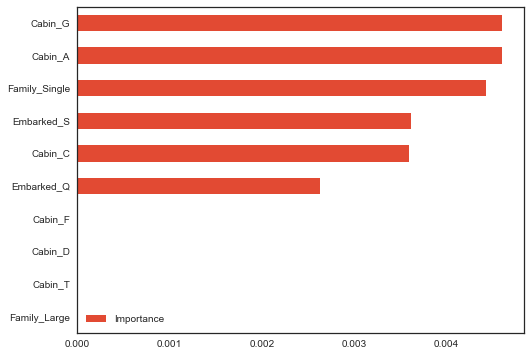

In [157]:
plot_variable_importance(train_x,train_y)

# Modeling

In [133]:
# Gaussian Naive Bayes
model=GaussianNB()

In [136]:
# Logistic Regression
model=LogisticRegression()

In [130]:
# K-nearest neighbors
model=KNeighborsClassifier(n_neighbors=3)

In [127]:
# Gradient Boosting Classifier
model=GradientBoostingClassifier()

In [30]:
# Random Forest
model=RandomForestClassifier(n_estimators=100)

In [124]:
# Support vector machines
model=SVC()

# Train the model

In [31]:
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

# Evaluation

In [32]:
#Score the model
print(model.score(train_x,train_y),model.score(valid_x,valid_y))

0.985553772071 0.828358208955


## Selecting optimal features for training

In [35]:
# We make a grid search of some hyperparameters of RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(train_x, train_y)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [37]:
predictions = clf.predict(valid_x)
print(accuracy_score(valid_y, predictions))

0.794776119403


0.781701444623 0.798507462687
Optimal number of features : 3


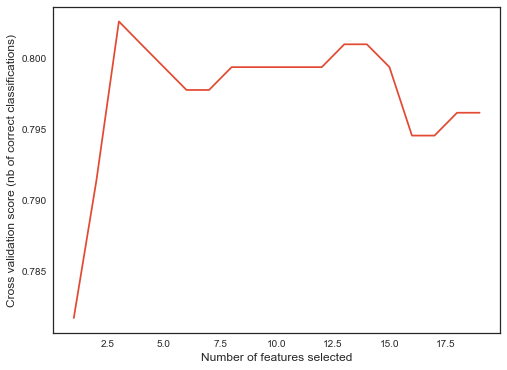

In [144]:
# We optimze parameters over KNearestNeighbors
rfecv = RFECV( estimator = model , step = 1 , cv = StratifiedKFold( train_y , 2 ) , scoring = 'accuracy' )
rfecv.fit( train_x , train_y )

print (rfecv.score( train_x , train_y ) , rfecv.score( valid_x , valid_y ))
print( "Optimal number of features : %d" % rfecv.n_features_ )

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel( "Number of features selected" )
plt.ylabel( "Cross validation score (nb of correct classifications)" )
plt.plot( range( 1 , len( rfecv.grid_scores_ ) + 1 ) , rfecv.grid_scores_ )
plt.show()

# Building dataframes from scratch

In [259]:
country=['Spain','France']
population=['11','12']
list_label=['country','population']
list_col=[country,population]
zipped=list(zip(list_label,list_col))
data_dict=dict(zipped)
data_dict
df=pd.DataFrame(data_dict) #The keys are the columns and the values the elements of the column
df

,country,population
0,Spain,11
1,France,12


In [261]:
#Add new columns
df['capital']=['madrid','paris']
df

,country,population,capital
0,Spain,11,madrid
1,France,12,paris


In [262]:
df['income']='a lot'
df

,country,population,capital,income
0,Spain,11,madrid,a lot
1,France,12,paris,a lot
